## HW 3

##### Sarasij Banerjee

## Question 1

The target is to generate a model that fits the observed data with minimum error. The parameters to be optimized are $A_{12}$ and $A_{21}$. Therefore the optimization problem can be formulated as $\underset{A_{12},A_{21}}{min} \sum_{i}(\hat{p}_{i}-p^{obs}_{i})^2$

In [4]:

import torch as tor
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np
T = 20
x1 = np.linspace(0,1,11)
x2 = np.linspace(1,0,11)
a_w = np.array([8.07131, 1730.63, 233.426])
a_d = np.array([7.43155, 1554.679, 240.337])
p_w = 10**(a_w[0] - a_w[1]/(T + a_w[2]))
p_d = 10**(a_d[0] - a_d[1]/(T + a_d[2]))
P = np.array([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5])

x1 = tor.tensor(x1, requires_grad=False, dtype=tor.float32)
x2 = tor.tensor(x2, requires_grad=False, dtype=tor.float32)

A = Variable(tor.tensor([1.0, 1.0]),requires_grad = True)
P = tor.tensor(P, requires_grad=False, dtype=tor.float32)

alpha = 0.001

for i in range(50):
    P_pred = x1 * tor.exp(A[0] * (A[1] * x2/(A[0] * x1 + A[1] * x2))**2) * p_w +\
        x2*tor.exp(A[1]*(A[0]*x1/(A[0]*x1 + A[1]*x2))**2) * p_d

    obj = (P_pred - P)**2
    obj = obj.sum()
    obj.backward()

    with tor.no_grad():
        A -= alpha*A.grad
        A.grad.zero_()

print('Optimal Values of A_12 ({}) and A_21 ({})'.format(A[0],A[1]))
print('fOptimal objective value: ',obj.data.numpy())



Optimal Values of A_12 (1.9579263925552368) and A_21 (1.6895899772644043)
fOptimal objective value:  0.67021877


[28.824099 34.641956 36.451256 36.86612  36.872917 36.748806 36.389854
 35.385315 32.949852 27.733002 17.473251]


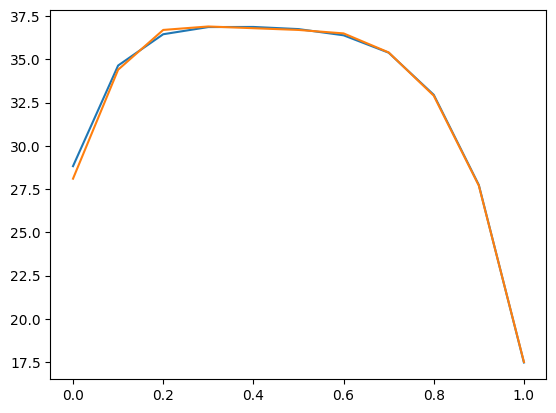

In [5]:
P_pr_plt = P_pred.detach().numpy()
P_plot = P.detach().numpy()
x1 = x1.detach().numpy()
print(P_pr_plt)

plt.plot(x1,P_pr_plt)
plt.plot(x1,P_plot)
plt.show()

From the results above, it is clearly visible that the predicted model provides a high fit to the obvserved dataset. This is also supported by the low value of the loss function ($e=0.67$) corresponding to the optimal values. 

## Question 2:

In [8]:
## problem 2:

import numpy as np
from bayes_opt import BayesianOptimization

def obj_function(x,y):
    obj = (4 - 2.1*x*2 + (x**4)/3)*x**2 + x*y +  (-4 + 4*y**2)*y**2
    return -obj

pbounds = {'x': (-3, 3), 'y': (-2, 2)}

optimizer = BayesianOptimization(
    f=obj_function,
    pbounds=pbounds,
    random_state=1000,
)

optimizer.maximize(
    init_points=500,
    n_iter=25,
)


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -11.91    |  0.9215   | -1.54     |
|  2        | -75.79    |  2.702    | -0.07123  |
|  3        | -13.77    |  2.235    | -1.151    |
|  4        | -264.8    | -2.756    | -0.4112   |
|  5        | -37.42    | -1.601    |  1.367    |
|  6        | -43.05    | -1.758    |  0.9699   |
|  7        | -7.636    | -0.6471   | -1.271    |
|  8        | -19.45    |  1.461    | -1.722    |
|  9        | -54.45    |  2.312    |  1.811    |
|  10       | -52.67    |  2.587    | -0.3383   |
|  11       | -331.5    | -2.826    |  1.928    |
|  12       | -6.048    | -0.9622   |  0.8267   |
|  13       | -40.79    | -0.8287   | -1.86     |
|  14       | -9.089    |  2.13     |  0.629    |
|  15       |  1.213    |  1.594    |  0.2163   |
|  16       | -40.88    |  2.311    |  1.617    |
|  17       | -382.1    | -2.937    | -1.702    |
|  18       | -40.97    | -1.532    | -1.467    |


In [10]:
print(-optimizer.max['target'])

-3.5774628226940677


https://github.com/bsarasij/Design_optim